<a href="https://colab.research.google.com/github/YonggunJung/Project1-KOSPI/blob/main/%EB%AA%A8%EB%8D%B8%ED%8F%89%EA%B0%80%EC%9A%A9_%EC%82%BC%EC%84%B1%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import shutil

# 경고 뜨지 않게..
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 랜덤 모듈
import random

# 학습 모델 저장 및 복원
import pickle

# 딥러닝 라이브러리
import tensorflow as tf
# 신경망 모델을 관리하는 객체
from tensorflow.keras.models import Sequential
# 선형 회귀 레이어
from tensorflow.keras.layers import Dense
# 활성화 함수를 정의하는 객체
from tensorflow.keras.layers import Activation
# CNN : 커널을 통해 합성곱을 구하는 것, 이미지의 특징이 두드러지게 한다.
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv1D
# MaxPooling : 커널내에서 가장 큰 값을 추출하는 방식으로 불필요한 부분을 제거한다., 값이 작은부분은 빠져버린다
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import MaxPool1D
# Flatten : 다차원의 이미지 데이터를 선형회귀 은닉층으로 전달하기 전에
# 1차원으로 변환하는것
from tensorflow.keras.layers import Flatten
# Dropout : 이미지나 영상, 음파등의 데이터는 오랫동안 학습을 진행 시켜야 한다.
# 하지만 너무 빨리 과적합이 발생되면 조기 중단 때문에 학습 횟수가 줄어들 수 있다.
# 이에 은닉의 노드를 일부 사용하지 않으므로써 과적합이 빨리 오는것을 예방하고
# 오랫동안 학습이 진행될 수있도록한다
from tensorflow.keras.layers import Dropout
# Embedding : 단어의 수를 조정한다.
from tensorflow.keras.layers import Embedding

# LSTM
from tensorflow.keras.layers import LSTM


from tensorflow.keras.layers import Input, Dense, LSTM, Bidirectional



# 원핫 인코딩을 수행하는 함수
from tensorflow.keras.utils import to_categorical

# 저장된 학습 모델을 복원한다.
from tensorflow.keras.models import load_model

# 모델을 자동 저장한다.
from tensorflow.keras.callbacks import ModelCheckpoint

# 성능이 더이상 좋아지지 않을 경우 중단 시킨다.
from tensorflow.keras.callbacks import EarlyStopping

# 문장을 잘라준다.
from tensorflow.keras.preprocessing.text import Tokenizer
# 모든 문장 데이터의 단어 데이터의 수를 동일한 수로 맞춰준다.
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 문자열을 가지고 단어 사전을 만들어준다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence


# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# 문자열 -> 숫자
from sklearn.preprocessing import LabelEncoder

# 전체데이터를 학습용과 검증으로 나눈다.
from sklearn.model_selection import train_test_split

# 랜덤시드 설정
# 데이터를 랜덤하게 섞거나 가중치를 랜덤하게 설정하는 등..
# 작업에서 랜덤을 적용하는 경우가 더러 있다.
# 이에, 시드를 고정시킨다.
random_seed = 1

np.random.seed(random_seed)
random.seed(random_seed)
tf.random.set_seed(random_seed)

# 현재 프로젝트에서 GPU 메모리 사용을 필요한 만큼만 쓸 수 있도록 한다.
# 컴퓨터에 있는 GPU 정보들을 가져온다.
gpus = tf.config.experimental.list_physical_devices('GPU')
# gpu가 있다면...
if len(gpus) > 0 :
    try :
        for gpu in gpus :
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e :
        print(e)

from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, Concatenate, Dropout
from tensorflow.keras import Input, Model
from tensorflow.keras import optimizers
import os

In [ ]:
# 데이터를 읽어온다.
cell = pd.read_csv('./data/samsung_stock.csv')
cell

,거래일,최고가,최저가,시작가,종가,거래량,수정종가
0,2010-01-04,16180.0,16000.0,16060.0,16180.0,11950800.0,12810.791016
1,2010-01-05,16580.0,16300.0,16520.0,16440.0,27925850.0,13016.649414
2,2010-01-06,16820.0,16520.0,16580.0,16820.0,22948850.0,13317.520508
3,2010-01-07,16820.0,16260.0,16820.0,16260.0,22107950.0,12874.130859
4,2010-01-08,16420.0,16120.0,16400.0,16420.0,14777550.0,13000.811523
...,...,...,...,...,...,...,...
3092,2022-08-12,60700.0,59400.0,59500.0,60200.0,10786658.0,60200.000000
3093,2022-08-16,61600.0,60300.0,60500.0,61000.0,15036727.0,61000.000000
3094,2022-08-17,61200.0,60300.0,61100.0,60400.0,9061518.0,60400.000000
3095,2022-08-18,61900.0,60000.0,60300.0,61500.0,16372754.0,61500.000000


In [ ]:
# 불필요한 컬럼을 제거한다.
cell.drop(['거래일', '수정종가'], axis=1, inplace=True)

In [ ]:
# 입력과 결과로 나눈다.
X = cell.drop('종가', axis = 1)
y = cell['종가']

display(X)
display(y)

,최고가,최저가,시작가,거래량
0,16180.0,16000.0,16060.0,11950800.0
1,16580.0,16300.0,16520.0,27925850.0
2,16820.0,16520.0,16580.0,22948850.0
3,16820.0,16260.0,16820.0,22107950.0
4,16420.0,16120.0,16400.0,14777550.0
...,...,...,...,...
3092,60700.0,59400.0,59500.0,10786658.0
3093,61600.0,60300.0,60500.0,15036727.0
3094,61200.0,60300.0,61100.0,9061518.0
3095,61900.0,60000.0,60300.0,16372754.0


0       16180.0
1       16440.0
2       16820.0
3       16260.0
4       16420.0
         ...   
3092    60200.0
3093    61000.0
3094    60400.0
3095    61500.0
3096    60900.0
Name: 종가, Length: 3097, dtype: float64

In [ ]:
# 표준화
scaler1 = StandardScaler()
# X = X.array.reshape(-1,1)
X = scaler1.fit_transform(X)
X

array([[-1.18299484, -1.17324522, -1.17992113, -0.40244887],
       [-1.16199841, -1.1572267 , -1.15557248,  1.76804556],
       [-1.14940055, -1.14547979, -1.15239656,  1.09183167],
       ...,
       [ 1.18015351,  1.19215642,  1.20412998, -0.79500917],
       [ 1.21689727,  1.1761379 ,  1.16178449,  0.19835216],
       [ 1.20114994,  1.20817495,  1.22000954, -1.09319423]])

In [ ]:
scaler2 = MinMaxScaler()
y = scaler2.fit_transform(y.values.reshape(-1, 1))
y

array([[0.03333333],
       [0.03669251],
       [0.04160207],
       ...,
       [0.60465116],
       [0.61886305],
       [0.61111111]])

In [ ]:
# # 2진 분류 옵션들
# out_nodes = 1
# loss_function = 'binary_crossentropy'
# activation_function = 'sigmoid'

# 다중 분류 옵션들
# out_nodes = len(y.value_counts())
# loss_function = 'categorical_crossentropy'
# activation_function = 'softmax'

# 회귀
# 출력 결과를 하나만 뽑아서 Series로 나왔다면...
# 1로 설정한다.
if type(y) is pd.core.series.Series :
    out_nodes = 1
else :
    out_nodes = y.shape[1]

loss_function = 'mean_squared_error'

In [ ]:
# 입력노드의 개수
input_size = X.shape[1]
input_size

4

In [ ]:
# 시퀀스 데이터셋 구성
# 시퀀스 데이터 : 순서를 가지고 있는 데이터를 의미한다.
def windowed_dataset(series, window_size, batch_size, shuffle) :
    # 데이터의 차원을 1차원으로 조정한다.
    series = tf.expand_dims(series, axis=-1)
    # 데이터셋 객체를 생성한다.
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w : w.batch(window_size + 1))
    if shuffle == True :
        ds = ds.shuffle(1000)

    ds = ds.map(lambda w : (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
# 학습용과 검증용으로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=1,
                                                   shuffle=False)

In [ ]:
X_train = X[:-100]
X_test = X[-100:]
y_train = y[:-100]
y_test = y[-100:]

In [ ]:
# 결과를 확인하기 위한 앞선 데이터의 수
WINDOW_SIZE = 20
# 데이터 배치 사이즈
BATCH_SIZE = 32

In [ ]:
# train_data는 학습용 데이터셋, test_data는 검증용 데이터 셋
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [ ]:
# 모델을 가져온다.
path = './model/모델평가용삼성_LSTM/'
best_model = load_model(path + '/best_model.h5')
best_model

In [ ]:
# 모델을 가져온다.
path2 = './model/모델평가용삼성_LSTM_AE/'
best_model2 = load_model(path2 + '/best_model.h5')
best_model2

In [ ]:
# 모델을 가져온다.
path3 = './model/모델평가용삼성_양방향LSTM/'
best_model3 = load_model(path3 + '/best_model.h5')
best_model3

In [ ]:
# 검증데이터를 통해 예측 결과를 가져온다.
pred = best_model.predict(test_data)
pred = pred.reshape(-1)
pred

3/3 [==============================] - 7s 537ms/step


array([0.68890786, 0.67882353, 0.67702   , 0.6597329 , 0.6568745 ,
       0.6971406 , 0.6930554 , 0.6944318 , 0.70274216, 0.68139136,
       0.6703871 , 0.67221963, 0.65855056, 0.6832421 , 0.67939466,
       0.69713515, 0.7051353 , 0.6950475 , 0.704004  , 0.70293415,
       0.6812934 , 0.68144786, 0.67428714, 0.6824843 , 0.6999137 ,
       0.693762  , 0.6834192 , 0.6869658 , 0.6670526 , 0.6644169 ,
       0.66395545, 0.6403311 , 0.6156472 , 0.617506  , 0.6021292 ,
       0.60677135, 0.59298843, 0.57822585, 0.57942635, 0.56780076,
       0.5662805 , 0.5828028 , 0.58689356, 0.5932648 , 0.5721906 ,
       0.5590379 , 0.5512692 , 0.56620663, 0.5671359 , 0.55331355,
       0.581308  , 0.5868282 , 0.5840415 , 0.574336  , 0.5740379 ,
       0.56794375, 0.60407716, 0.627075  , 0.60641307, 0.60165304,
       0.6227299 , 0.61320823, 0.60944927, 0.61974186, 0.61972845,
       0.6201331 , 0.61337036, 0.61252373, 0.6189284 , 0.61243767,
       0.6153979 , 0.6158358 , 0.60549396, 0.59565556, 0.58498

In [ ]:
# 검증데이터를 통해 예측 결과를 가져온다.
pred2 = best_model2.predict(test_data)
pred2 = pred2.reshape(-1)
pred2

3/3 [==============================] - 2s 41ms/step


array([0.68666863, 0.67894447, 0.67669165, 0.6625308 , 0.6602779 ,
       0.69246167, 0.6895652 , 0.691818  , 0.6972892 , 0.68087554,
       0.67186403, 0.6721859 , 0.6618871 , 0.6811974 , 0.6776571 ,
       0.69342715, 0.69954205, 0.69246167, 0.69954205, 0.6985766 ,
       0.6811974 , 0.68087554, 0.6747606 , 0.68151927, 0.6953582 ,
       0.6911743 , 0.68312836, 0.6850594 , 0.6686457 , 0.66671467,
       0.6654273 , 0.64740443, 0.6258413 , 0.62487584, 0.60878396,
       0.6123241 , 0.59558856, 0.5811059 , 0.5801404 , 0.56823236,
       0.56597954, 0.5804622 , 0.5843243 , 0.59140474, 0.57112896,
       0.55889904, 0.55020946, 0.56437033, 0.56404847, 0.55149686,
       0.57788754, 0.5833587 , 0.58303696, 0.5730599 , 0.5730599 ,
       0.5669451 , 0.6023472 , 0.624554  , 0.60814023, 0.6036345 ,
       0.62326664, 0.61586434, 0.6129678 , 0.6206919 , 0.6223011 ,
       0.62326664, 0.6168298 , 0.61586434, 0.62133557, 0.61554253,
       0.6184391 , 0.6184391 , 0.60878396, 0.5984851 , 0.58689

In [ ]:
# 검증데이터를 통해 예측 결과를 가져온다.
pred3 = best_model3.predict(test_data)
pred3 = pred3.reshape(-1)
pred3

3/3 [==============================] - 1s 41ms/step


array([0.688987  , 0.6780193 , 0.6744288 , 0.6622635 , 0.65780413,
       0.68932617, 0.6957524 , 0.6958033 , 0.6994393 , 0.6828835 ,
       0.66908383, 0.6684195 , 0.6607467 , 0.6784718 , 0.68120956,
       0.6951958 , 0.70362794, 0.69621336, 0.6993412 , 0.6994393 ,
       0.6821747 , 0.67726076, 0.6729232 , 0.67989457, 0.69640875,
       0.6955602 , 0.6849004 , 0.68337953, 0.66877985, 0.66382873,
       0.6636189 , 0.64795923, 0.6252657 , 0.6202538 , 0.60980284,
       0.61051786, 0.60144305, 0.58769596, 0.58328855, 0.57343495,
       0.5696794 , 0.58192945, 0.59005654, 0.5968034 , 0.5809814 ,
       0.5650286 , 0.5541011 , 0.5635115 , 0.5680754 , 0.5591054 ,
       0.57748735, 0.5890869 , 0.59002185, 0.5805924 , 0.57688963,
       0.5711604 , 0.5993427 , 0.6248679 , 0.6165366 , 0.60781205,
       0.6192558 , 0.6177546 , 0.6139484 , 0.61963665, 0.6227217 ,
       0.6238365 , 0.61812824, 0.61582327, 0.619989  , 0.6172353 ,
       0.6180675 , 0.6185659 , 0.61167896, 0.60224986, 0.59215

In [ ]:
# 원래 결과를 1차원으로 변환한다.
y_test2 = y_test.reshape(-1)
# 20일치를 가지고 21일째를 예측하기 떄문에
# 앞선 20일은 예측하지 않는다.
y_test2 = y_test2[20:]
y_test2

array([0.68087855, 0.67829457, 0.66408269, 0.66149871, 0.69509044,
       0.69379845, 0.69638243, 0.70155039, 0.68346253, 0.67312661,
       0.67312661, 0.6627907 , 0.68346253, 0.68087855, 0.69767442,
       0.70413437, 0.69638243, 0.70284238, 0.70155039, 0.68346253,
       0.68217054, 0.67571059, 0.68346253, 0.69896641, 0.69509044,
       0.68604651, 0.6873385 , 0.67054264, 0.66795866, 0.66666667,
       0.64857881, 0.62661499, 0.62403101, 0.60852713, 0.61111111,
       0.59689922, 0.58268734, 0.58010336, 0.56847545, 0.56589147,
       0.57881137, 0.58397933, 0.59173127, 0.57364341, 0.56072351,
       0.5503876 , 0.5620155 , 0.56330749, 0.55297158, 0.57622739,
       0.58268734, 0.58397933, 0.5749354 , 0.57364341, 0.56718346,
       0.5994832 , 0.62403101, 0.61111111, 0.60594315, 0.62273902,
       0.61627907, 0.61369509, 0.62144703, 0.62273902, 0.62403101,
       0.61757106, 0.61627907, 0.62144703, 0.61627907, 0.61886305,
       0.61886305, 0.60981912, 0.5994832 , 0.5878553 , 0.59819

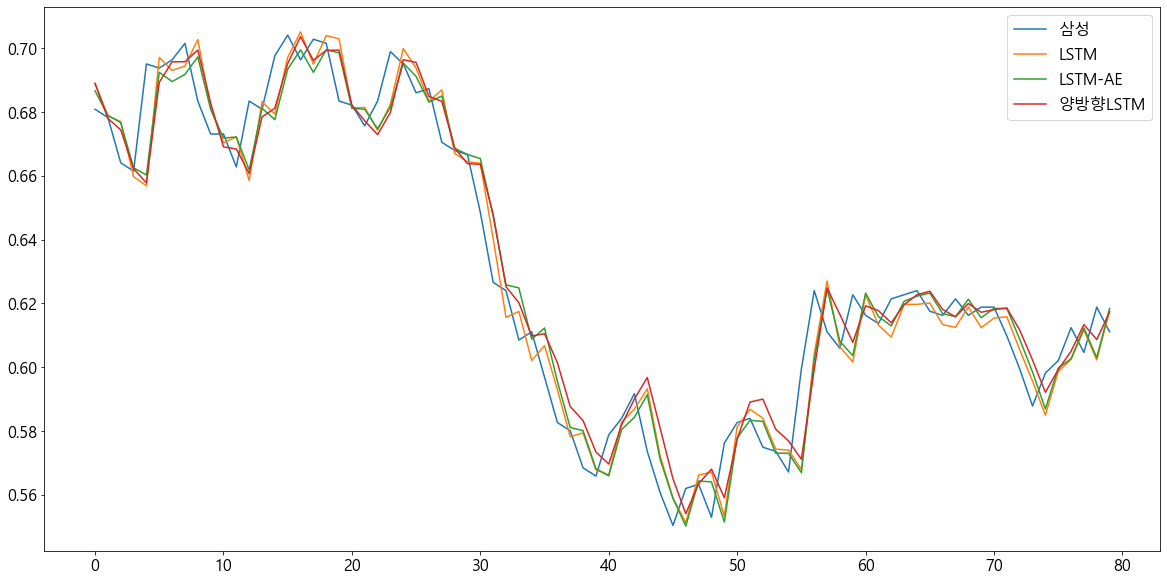

In [ ]:
# 양방향 LSTM
# plt.title('달러_코스피 그래프')
plt.plot(y_test2, label = '삼성')
plt.plot(pred, label='LSTM')
plt.plot(pred2, label='LSTM-AE')
plt.plot(pred3, label = '양방향LSTM')
# plt.xticks(cell.index)
plt.legend()
plt.show()